# **Project Name**    - Retail Sales Prediction



##### **Project Type**    -  Regression Capstone Project
##### **Contribution**    - Team
##### **Team Member 1 -** Aishwarya Raj
##### **Team Member 2 -** Durgesh Soni
##### **Team Member 3 -** Sanjay Kumareshan
##### **Team Member 4 -** Shashanka Sekhar Nayak 
##### **Team Member 5 -** Yash Soni

# **GitHub Link -**

Link :- https://github.com/yashsoni294/Retail_Sales_Prediction_Capstone_Regression_Project

# **Problem Description**

**Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

**Data Description**

Rossmann Stores Data.csv - historical data including Sales
store.csv - supplemental information about the stores

**Data fields**

Most of the fields are self-explanatory.

**Id** - an Id that represents a (Store, Date) duple within the set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (Dependent Variable)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools

**StoreType** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince**[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

**Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2

**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store



**Business Problem**


The interest in a product continues to change occasionally. No business can work on its monetary growth without assessing client interest and future demand of items precisely. Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time. This project involves solving a real-world business problem of sales forecasting and building up a machine learning model for the same.

Our goal here is to forecast the sales for six weeks for each store and find out the factors influencing it and recommend ways in order to improve the numbers.


**Approach**


* Business Problem

* Data Collection and Preprocessing - Importing important libraries and modules - Data Cleaning - Missing Data Handling - Merging the Datasets
* Exploratory Data Analysis - Hypotheses - Categorical Features - Continuous Features - EDA Conclusion and Validating Hypotheses
* Feature Selection and Outlier Detection - Feature Engineering - Outlier Detection and Treatment
* Modeling - Train Test Split - Baseline Model - Decision Tree - Random Forest Model - Random Forest Hyperparameter Tuning - Random Forest Feature Importance
Model Performance and Evaluation - Visualizing Model Performances - Random Forest vs Baseline Model - Random Forest Tuned vs Baseline and Random Forest Models
* Store wise Sales Predictions
* Conclusion and Recommendations


### Import Libraries

In [ ]:
#Importing important libraries and modules
import pandas as pd # for dataframe analysis 
import numpy as np # for array manupulation and math fuction
import matplotlib as mpl #for data visualisatio
import matplotlib.pyplot as plt # for data visualisation 
%matplotlib inline 
import seaborn as sns # for data visualisation
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore') #ignoring the warnigs which we could face

### Dataset Loading

In [ ]:
# here we are loading the csv files and converting them into dataframe 
df_stores = pd.read_csv("/content/store.csv")
df_sales = pd.read_csv("/content/Rossmann Stores Data.csv")

### Dataset First View

In [ ]:
# First Look of sales dataset
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,7/31/2015,5263,555,1,1,0,1
1,2,5,7/31/2015,6064,625,1,1,0,1
2,3,5,7/31/2015,8314,821,1,1,0,1
3,4,5,7/31/2015,13995,1498,1,1,0,1
4,5,5,7/31/2015,4822,559,1,1,0,1


In [ ]:
# First Look of stores dataset
df_stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df_stores.shape # gives us rows and column count of stores dataset

(1115, 10)

In [ ]:
df_sales.shape # gives us rows and column count of sales dataset

(1017209, 9)

### Dataset Information

In [ ]:
# Dataset Info about the sales dataset
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


There are 1017209 rows or observations and 9 columns in this dataset. There seems to be no null values in it. It has integer, datetime and object as data types.

In [ ]:
# Dataset Info about the stores dataset
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are 1115 rows and 10 columns. There are missing values in it and it is important to impute them with appropriate values in order to get good results later on.


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count in stores df

df_stores.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Out of 1115 entries there are missing values for the columns:

* CompetitionDistance- distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

* CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

* CompetitionOpenSinceYear- gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

* Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

In [ ]:
# Visualizing the missing values

Text(0.5, 0, 'Competition Distance Distribution Plot')

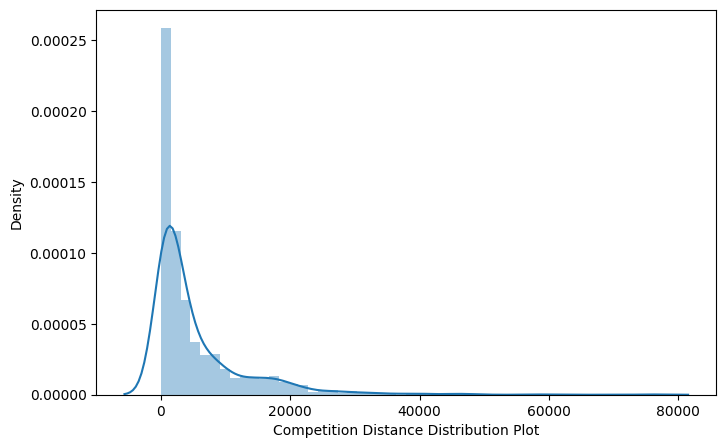

In [ ]:

#distribution plot of competition distance
sns.distplot(x=df_stores['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect.

In [ ]:
# filling competition distance with the median value
df_stores['CompetitionDistance'].fillna(df_stores['CompetitionDistance'].median(), inplace = True)

In [ ]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
df_stores['CompetitionOpenSinceMonth'].fillna(df_stores['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
df_stores['CompetitionOpenSinceYear'].fillna(df_stores['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:

# imputing the nan values of promo2 related columns with 0
df_stores['Promo2SinceWeek'].fillna(value=0,inplace=True)
df_stores['Promo2SinceYear'].fillna(value=0,inplace=True)
df_stores['PromoInterval'].fillna(value=0,inplace=True)
     

In [ ]:

#check again for null values
df_stores.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:

#now merging  the datasets on stores data
df_final = df_sales.merge(right=df_stores, on="Store", how="left")
     

In [ ]:
#first five rows of the merged dataset
df_final.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,7/31/2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,7/31/2015,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,7/31/2015,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,7/31/2015,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,7/31/2015,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
df_final.shape #shape of the dataframe

(1017209, 18)

In [ ]:
df_final.info() #datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
#creating a categorical column list this all rows are categorical 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [ ]:
#checking the unique values involved and if all the values are in appropriate datatypes
for col in categorical_variables:
  print(f'Unique values for {col}: {df_final[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [ ]:
#change into int type
df_final['StateHoliday'].replace({'0':0}, inplace=True)

In [ ]:
#creating features from the date
df_final['Year'] = pd.DatetimeIndex(df_final['Date']).year
df_final['Month'] = pd.DatetimeIndex(df_final['Date']).month
df_final['WeekOfYear'] = pd.DatetimeIndex(df_final['Date']).weekofyear
df_final['DayOfYear'] = pd.DatetimeIndex(df_final['Date']).dayofyear
years = df_final['Year'].unique()

# df_final["Date"]
# df_final['Year'] = df_final['Date'].dt.strftime('%Y')
# df_final.Date.info()
# df_final['year'] = pd.DatetimeIndex(df_final['Date']).year
# df_final["year"]
years

array([2015, 2014, 2013])

# Exploratory Data Analysis

Exploratory data analysis (EDA) is a fundamental component of data analysis that entails examining and scrutinizing a dataset to uncover patterns, trends, and insights that can aid in making informed decisions. The process involves utilizing statistical graphics and data visualization tools such as matplotlib and seaborn to synthesize the results. Python libraries such as pandas are commonly used to explore the dataset, including analyzing its structure, size, and content. During EDA, both continuous and categorical variables are assessed to determine their impact on the dependent variable, which in this case is 'Sales.'

**Hypotheses**

By examining the initial rows of the dataset and comprehending the variables involved, it is possible to generate some hypotheses:

*  There's a feature called "DayOfWeek" with the values 1-7 denoting each day of the week. There would be a week off probably Sunday when the stores would be closed and we would get low overall sales.
* Customers would have a positive correlation with Sales.
* The Store type and Assortment strategy involved would be having a certain effect on sales as well. Some premium high quality products would fetch more revenue.
* Promotion should be having a positive correlation with Sales.
* Some stores were closed due to refurbishment, those would generate 0 revenue for that time period.
* Stores are influenced by seasonality, probably before holidays sales would be high.

Next step is to explore and see in a data driven way about the factors influencing Rossmann stores sales and how.

Categorical Features:**bold text**

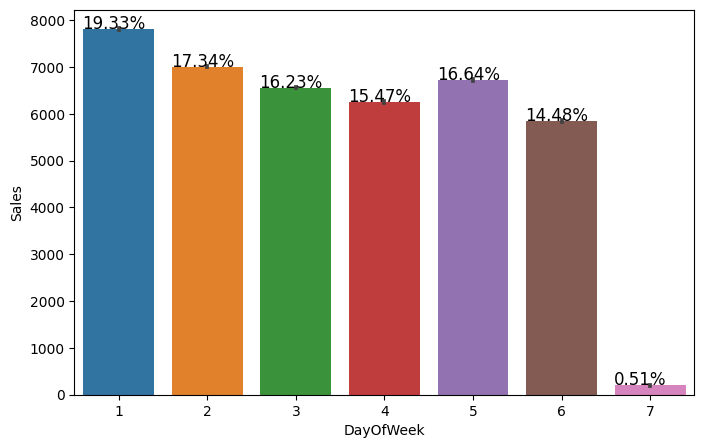

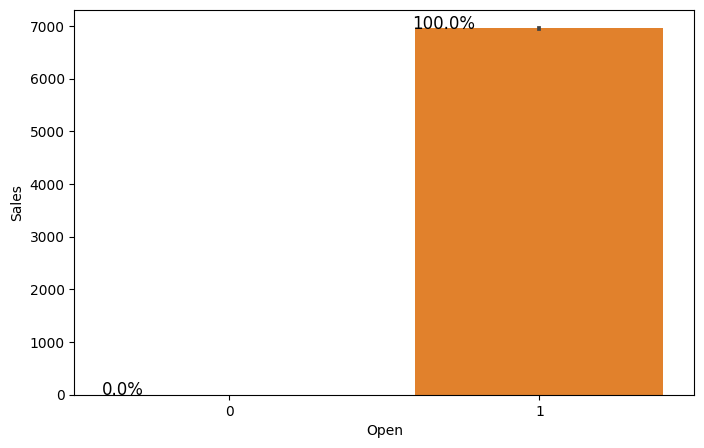

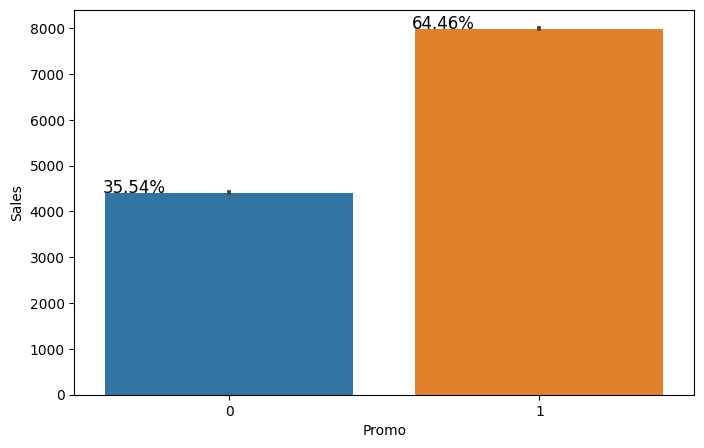

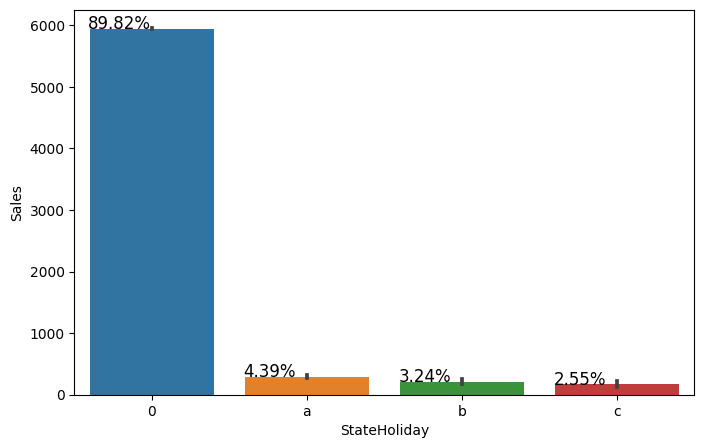

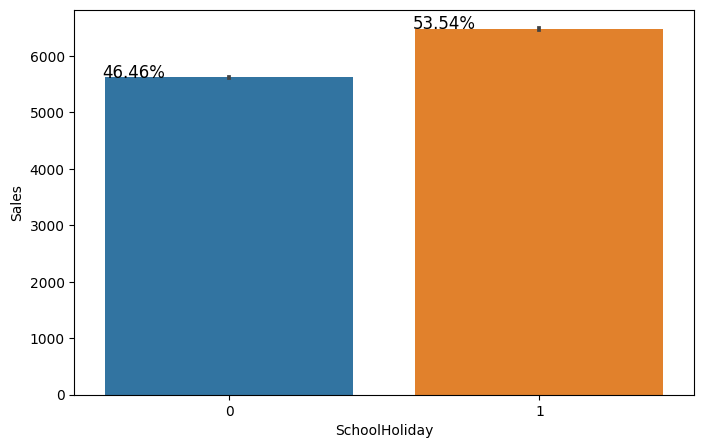

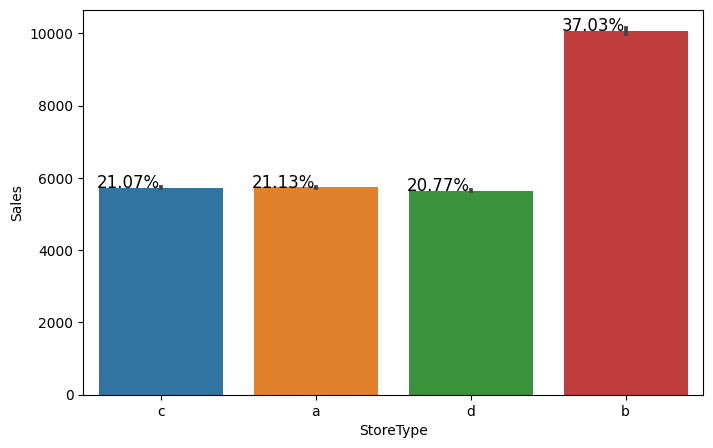

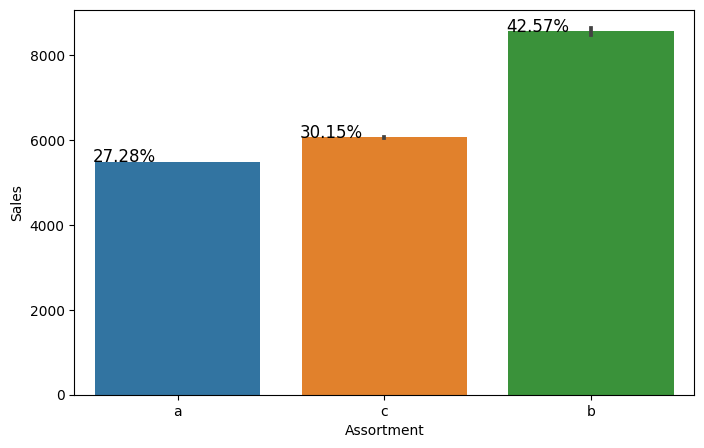

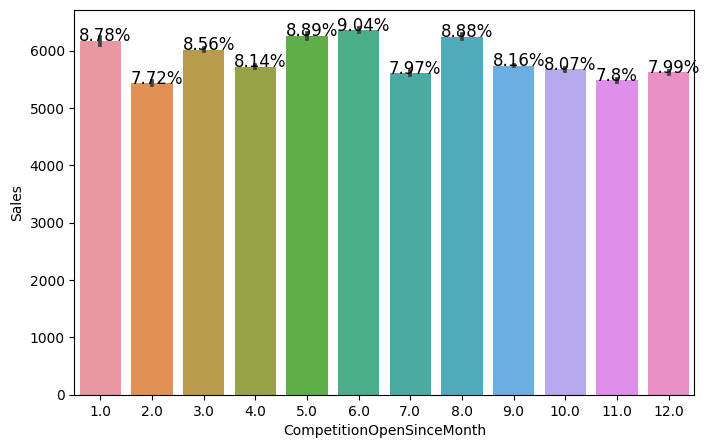

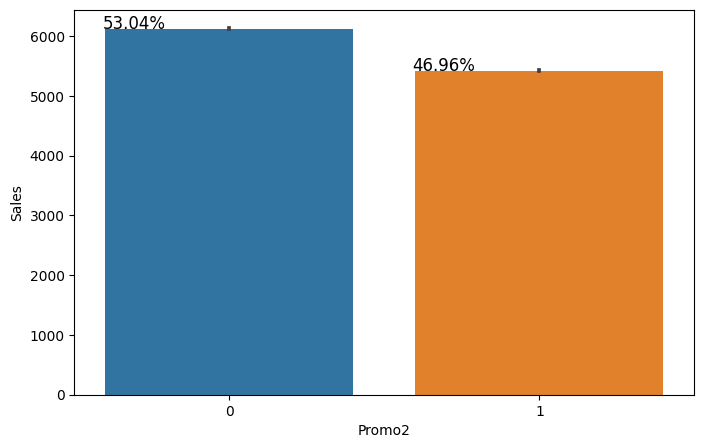

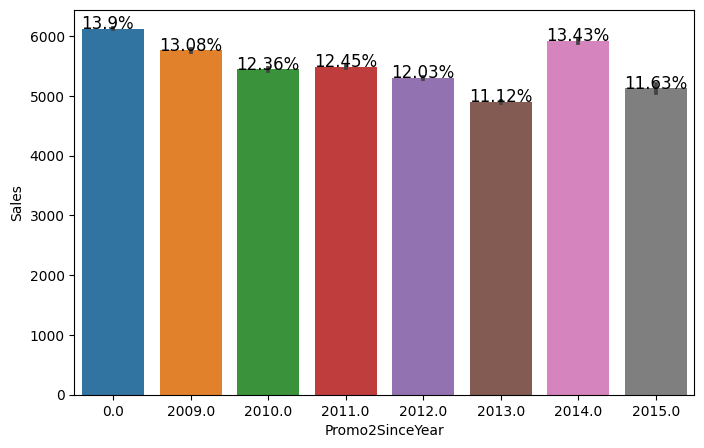

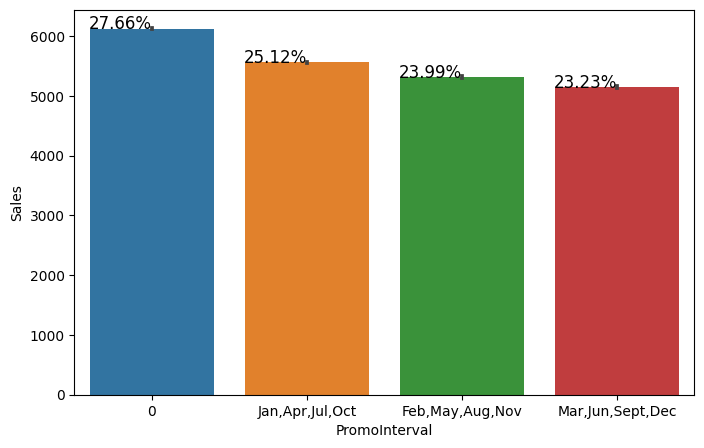

In [ ]:
#  barplots of the categorical variables against sales
# We are iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df_final[value], y=df_final['Sales']) 
  totals = []
  for i in ax.patches: #for every patch in the barplot ax
      totals.append(i.get_height()) #append height for each patch

  total = sum(totals) #sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
  plt.show()

**Observation**:

* There were more sales on Monday, probably because shops generally remain closed on Sundays.
* It could be seen that the Promo leads to more sales.
* Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
* More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
* On an average Store type B had the highest sales.
* Highest average sales were seen with Assortment levels-b which is 'extra'.
* With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

<Axes: xlabel='Open', ylabel='Sales'>

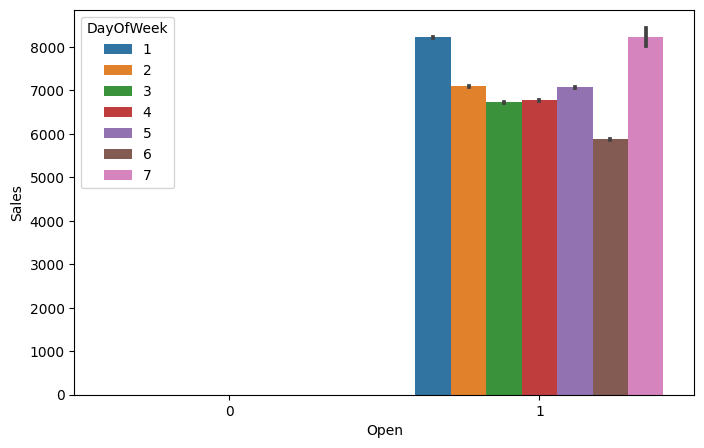

In [ ]:
# open and storetype relationship 
#this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
sns.barplot(x=df_final["Open"],y=df_final['Sales'],hue=df_final["DayOfWeek"])

<Axes: xlabel='Open', ylabel='count'>

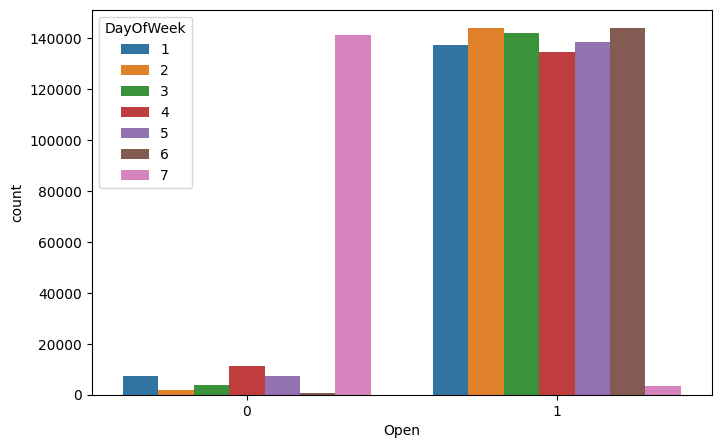

In [ ]:

#Lets see open, how many shops are open on which days 
#and this gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday
sns.countplot(x=df_final["Open"], hue=df_final["DayOfWeek"])
     

**Observation**:

This is a count plot of open shops according to the day of the week. It's clear that the number of shops open on Sundays were very less and hence low sales. Some shops were closed on weekdays as well accounting to the stores closed due to refurbishment or holidays.

<Axes: xlabel='StoreType', ylabel='Sales'>

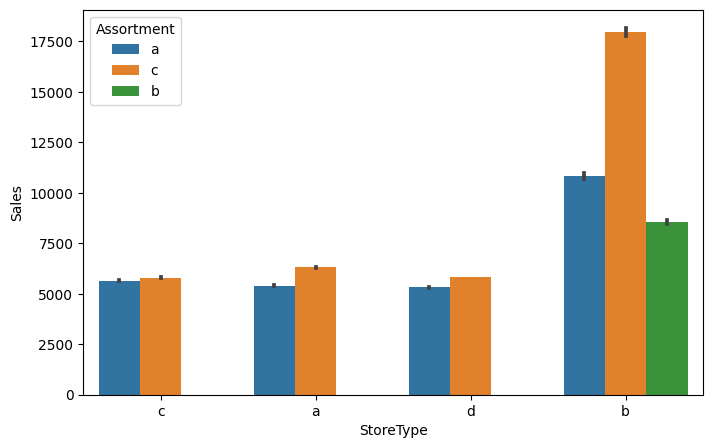

In [ ]:
#  relationship between store type, assortment levels and sales
sns.barplot(x=df_final["StoreType"],y=df_final['Sales'],hue=df_final["Assortment"])

**Observation**:

The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

In [ ]:
#Store Type and Sales Exploration
store_type = df_final.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


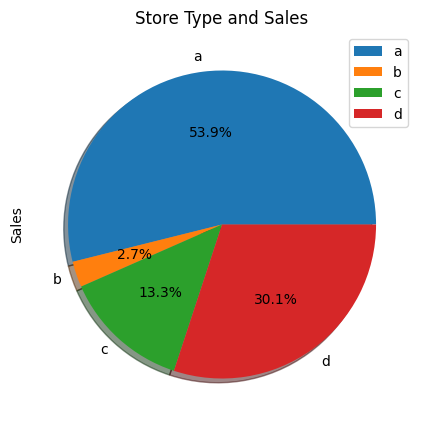

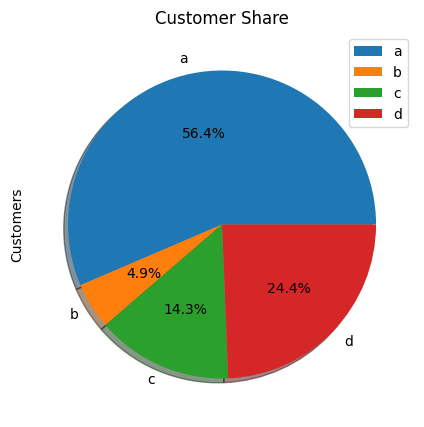

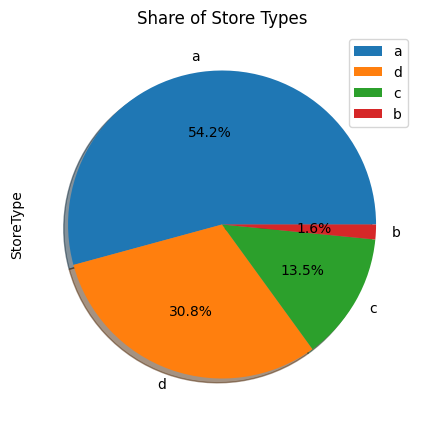

In [ ]:

#let's explore store type a bit and it's influence on sales
df_final.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
df_final.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
df_final["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

**Observation**:

* A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.
* But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
* Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

**Continuous Features:**

Sales with Time

In [ ]:
years

array([2015, 2014, 2013])

In [ ]:
# creating data frame for all different years
sales_df_2013 = df_final[df_final['Year']== 2013]
sales_df_2014 = df_final[df_final['Year']==2014]
sales_df_2015 = df_final[df_final['Year']== 2015]

In [ ]:
#using group by on monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()

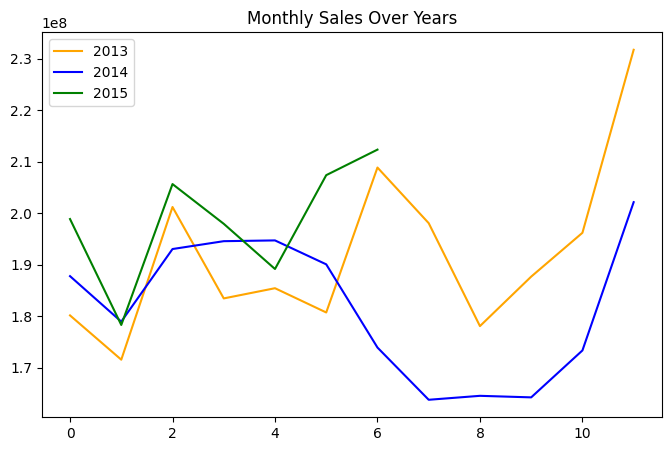

In [ ]:
#plotting monthly sales over years 
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

**Observation**:

Sales rise up by the end of the year before the holidays. Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.

<Axes: xlabel='Customers', ylabel='Sales'>

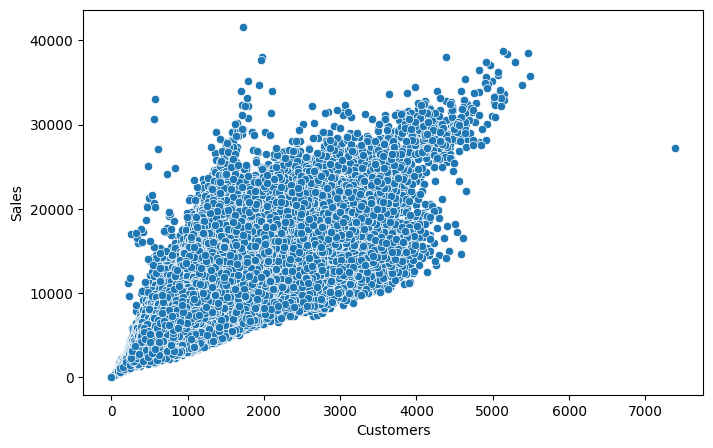

In [ ]:
#scatterplot of Customers and Sales
sns.scatterplot(x=df_final['Customers'], y=df_final['Sales'])

**Observation**:

Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

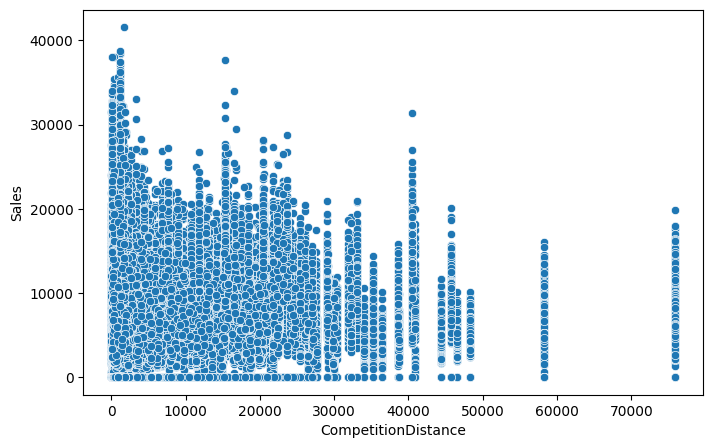

In [ ]:
#scatterplot between Competition Distance and Sales
sns.scatterplot(x=df_final['CompetitionDistance'], y=df_final['Sales'])

**Observation**:

From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

<Axes: ylabel='Density'>

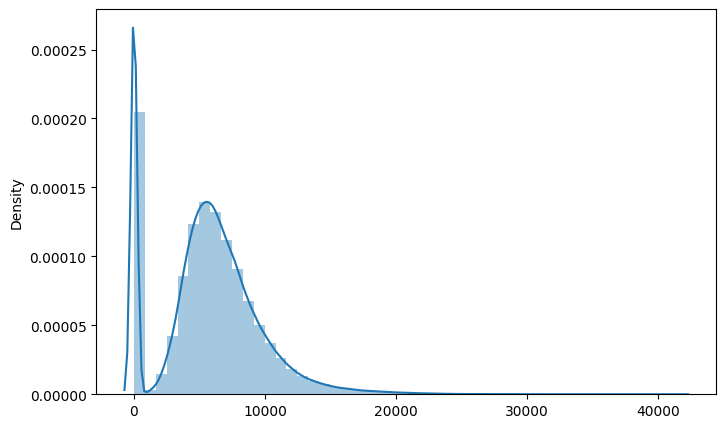

In [ ]:
#distribution plot of Sales, as expected positively skewed
sns.distplot(x=df_final['Sales'])

**Observation**:

The drop in sales indicates the 0 sales accounting to the stores temporarily closed due to refurbishment. This drop was also seen in the Sales over the years plot earlier.

## **Correlation Matrix**

Correlation is a statistical measure that describes how two or more variables are related to each other. A perfect positive correlation indicates a correlation coefficient of 1, which means that as one variable increases, the other variable also tends to increase in a consistent and proportional manner. A perfect negative correlation, on the other hand, implies a correlation coefficient of -1, indicating that as one variable increases, the other variable tends to decrease in a consistent and proportional manner.

In contrast, a zero correlation indicates that there is no linear relationship between the variables. This means that changes in one variable do not necessarily correspond to changes in the other variable. It is important to keep in mind that correlation does not necessarily imply causation, and other factors may be responsible for the observed correlation.

By checking the correlation the factors affecting sales can be figured out.

In [ ]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
drop_columns = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = df_final.drop(columns = drop_columns, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

<Axes: >

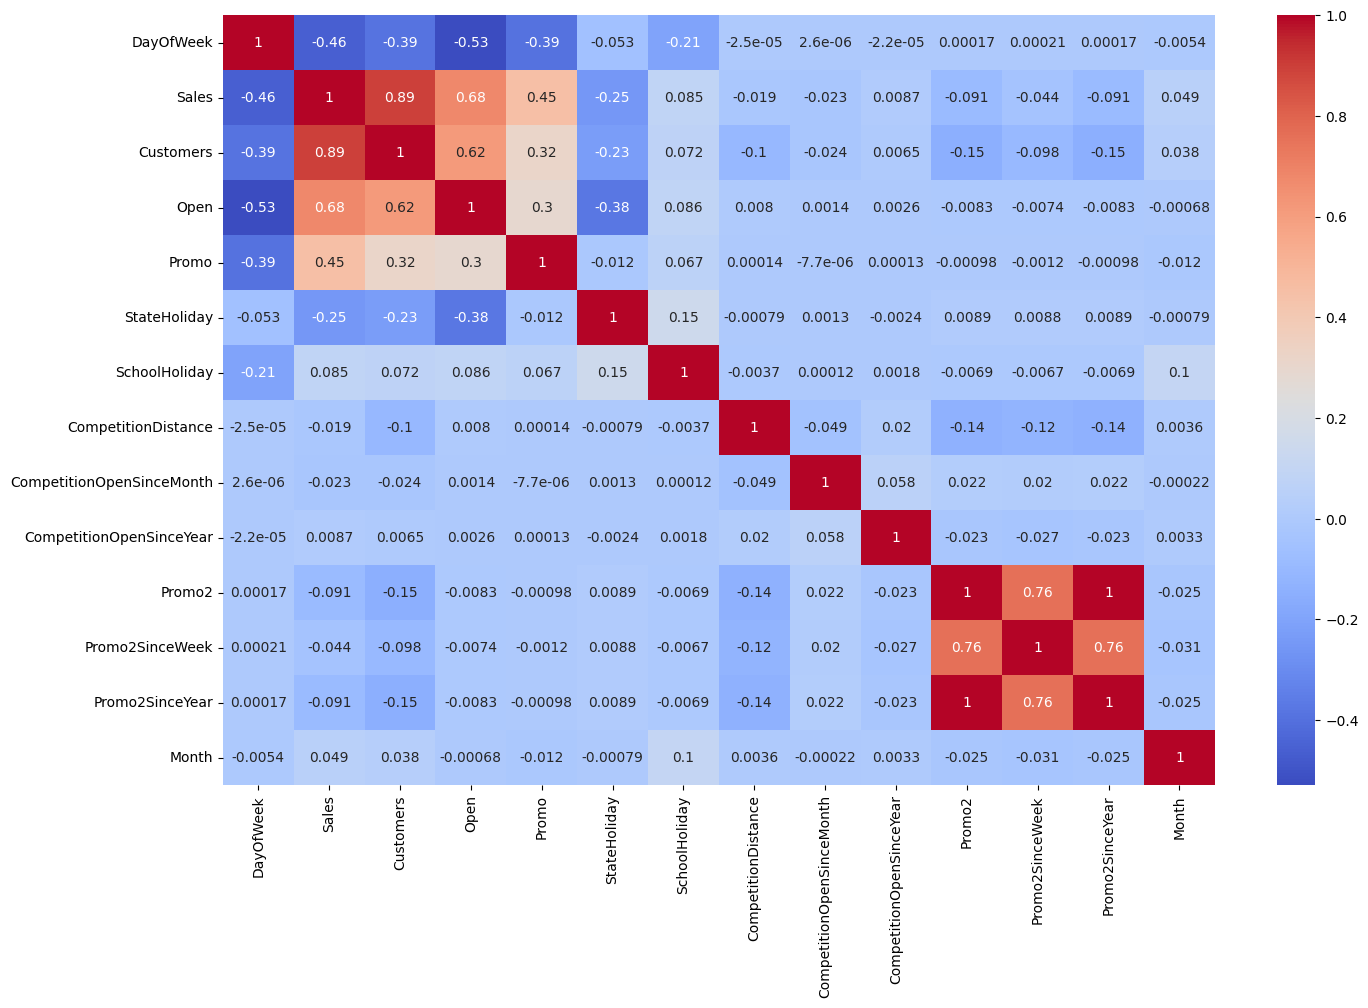

In [ ]:
# Ploting Correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)

**Observation**:

* Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.
* State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
* CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.
* There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.
* The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

# EDA Conclusions and Hypotheses Validation:

* There's a positive correlation between customers and sales which is explanatory.

* Here it can be deduced that there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.

* The positive effect of promotion on Customers and Sales is observable.

* It is clear that most of the stores remain closed during State and School Holidays.

* But it is important to note that more stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.

* Based on the above findings it seems that there are quite a lot of opportunities in store type 'b' & 'd' as they had more number of customers per store and more sales per customer, respectively. Store type a & c are quite similar in terms of "per customer and per store" sales numbers and just because the majority of the stores were of these kinds, they had the best overall revenue numbers. On the other hand, store type b were very few in number and even then they had better average sales than others.

* Earlier, it was observed that only store type b had all three kinds of assortment levels and rest of the store types had two of them. It seems that in some b type stores the products were different as compared to others because the revenue per store is significantly more than the others.

* When comparing the sales of the three years, it is observable that sales increase by the end of the year indicating that people shop more before the holidays. All the stores showed Christmas seasonality. This validates the previous hypothesis.

The second thing to notice was that sales dropped for a few months in 2014 accounting for the stores closed due to refurbishment.

* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away.

## Feature Engineering & Data Pre-processing

Manipulating data refers to the process of modifying and transforming the dataset prior to utilizing it for machine learning purposes. This typically involves selecting relevant variables, addressing outliers, performing feature scaling, and possibly generating binary variables to represent categorical features.

**Feature Engineering**

In [ ]:
# No of observations for closed stores with 0 sales
(df_final[df_final.Open == 0]).shape

(172817, 22)

It is mentioned in the problem statement that some stores were temporarily closed for refurbishment and hence did not generate any sales. This was also indicated in the barplot of Open vs Sales.

In [ ]:
#since the stores closed had 0 sale value; removing the irrelevant part
df_1 = df_final[df_final.Open != 0]
df_1.drop('Open', axis=1, inplace=True)

In [ ]:
# Lets check
df_1.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,7/31/2015,5263,555,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212


<Axes: ylabel='Density'>

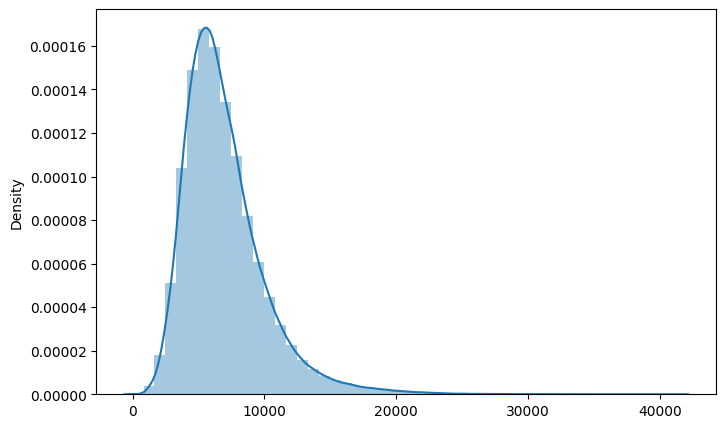

In [ ]:
# Ploting the Distribution of Sales
sns.distplot(x=df_1['Sales'])

In [ ]:
## taking logtransformation
df_1['Sales'] = np.log(df_1['Sales'])

In [ ]:
df_1.dropna(inplace=True) # Dropping all null values from the dataframe 

In [ ]:
df_1.drop(df_1[df_1['Sales'] == float("-inf")].index,inplace=True)

<Axes: ylabel='Density'>

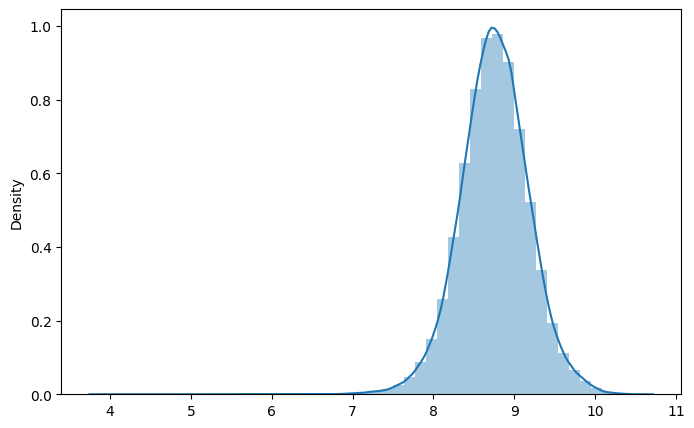

In [ ]:
#distribution plot of Sales
sns.distplot(x=df_1['Sales'])

In [ ]:
# changing into boolean 
df_1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [ ]:

#combining competition open since month and year into total months
df_1['CompetitionOpen'] = (df_1['Year'] - df_1['CompetitionOpenSinceYear'])*12 + (df_1['Month'] - df_1['CompetitionOpenSinceMonth'])
#correcting the neg values
df_1['CompetitionOpen'] = df_1['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
df_1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)
     

In [ ]:
# changing promo2 features into meaningful inputs
#combining promo2 to total months
df_1['Promo2Open'] = (df_1['Year'] - df_1['Promo2SinceYear'])*12 + (df_1['WeekOfYear'] - df_1['Promo2SinceWeek'])*0.230137

#correcting the neg values
df_1['Promo2Open'] = df_1['Promo2Open'].apply(lambda x:0 if x < 0 else x)*df_1['Promo2']

#creating a feature for promo interval and checking if promo2 was running in the sale month
def promo2running(df):
  month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  try:
    months = df['PromoInterval'].split(',')
    if df['Month'] and month_dict[df['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0

#Applying 
df_1['Promo2running'] = df_1.apply(promo2running,axis=1)*df_1['Promo2']

#Dropping unecessary columns
df_1.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)
     

In [ ]:
# setting date and store as index
df_1.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df_1.sort_index(inplace=True)

In [ ]:
# viewing our dataframe
df_1.head()

DayOfWeek     Sales  Customers  Promo  StateHoliday  \
Date     Store                                                        
1/1/2013 85             2  8.347590        619      0             1   
         259            2  8.832150       1444      0             1   
         262            2  9.756552       2875      0             1   
         274            2  8.039802        729      0             1   
         335            2  7.783641        482      0             1   

                SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date     Store                                                            
1/1/2013 85                 1         b          a               1870.0   
         259                1         b          b                210.0   
         262                1         b          a               1180.0   
         274                1         b          b               3640.0   
         335                1         b          a                 90.0   

                Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date     Store                                                                
1/1/2013 85          0  2013      1           1          1             15.0   
         259         0  2013      1           1          1              0.0   
         262         0  2013      1           1          1              0.0   
         274         1  2013      1           1          1              0.0   
         335         1  2013      1           1          1              0.0   

                Promo2Open  Promo2running  
Date     Store                             
1/1/2013 85            0.0              0  
         259           0.0              0  
         262           0.0              0  
         274           0.0              1  
         335           0.0              1

# Outlier Detection

**Outliers and Z score**:

An outlier is an observation that stands out from the rest of the data, either due to measurement errors or a heavy-tailed distribution. The Z-score is a statistical metric that measures the distance of a data point from the mean of the dataset in terms of standard deviations. In other words, it calculates how many standard deviations away a given observation is from the mean of the dataset, allowing for a standardized comparison of different data points. 

The formula for Z-score is (x-mean)/standard deviation.

Total number of Outliers present in the Sales column are 1559.


[Text(0.5, 1.0, 'Outliers Distribution')]

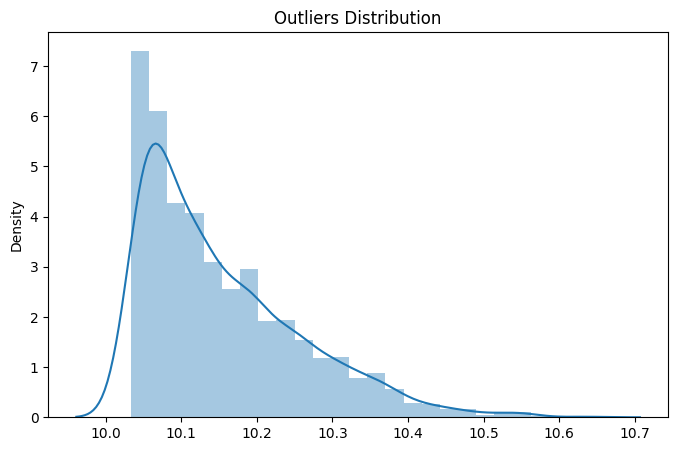

In [ ]:
#code to seperate outliers
mean_sales = np.mean(df_1['Sales']) #mean of sells
sd_sales = np.std(df_1['Sales'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in df_1['Sales']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
#total no of outliers        
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')
#plotting the outlier distribution
sns.distplot(x=outliers).set(title='Outliers Distribution')

In [ ]:
#  percentage of sales greater than 10.2
sales_outliers = df_1.loc[df_1['Sales']> 10.2]
percentage_of_outliers = (len(sales_outliers)/len(df_1))*100
#print
print(f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')

The percentage of observations of sales greater than 28000 are 0.050809036191667316


In [ ]:
# Lets exploring for the reasons behind this behaviour
sales_outliers

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
1/20/2014,983,1,10.358473,2834,1,0,0,a,a,40.0,1,2014,1,4,20,0.0,0.690411,1
1/21/2013,817,1,10.330942,3900,1,0,0,a,a,140.0,0,2013,1,4,21,82.0,0.000000,0
1/22/2013,817,2,10.210605,7388,1,0,0,a,a,140.0,0,2013,1,4,22,82.0,0.000000,0
1/5/2015,842,1,10.380591,1793,1,0,1,d,c,1200.0,0,2015,1,2,5,86.0,0.000000,0
1/6/2014,817,1,10.200290,3473,1,0,0,a,a,140.0,0,2014,1,2,6,94.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/21/2014,262,7,10.301492,4477,0,0,0,b,a,1180.0,0,2014,9,38,264,16.0,0.000000,0
9/27/2013,126,5,10.205442,613,1,0,0,d,a,3370.0,1,2013,9,39,270,0.0,28.832877,0
9/7/2014,262,7,10.295496,4496,0,0,0,b,a,1180.0,0,2014,9,36,250,16.0,0.000000,0


Observation:

Some interesting insights can be drawn from these outliers dataframe:

* First thing that comes to notice is the DayOfWeek for Store 262. It's sunday and it has high sales and it's of the store type B.
* All other data points had promotion going on and they had a high number of Customers as well indicating no absurd behavior.
* It can be well established that the outliers are showing this behavior for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behavior seems fair.

In [ ]:
#lets see which stores were open on Sunday in the outliers dataframe
#store 262
sales_outliers.loc[sales_outliers['DayOfWeek']==7]

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
10/12/2014,262,7,10.289906,4331,0,0,0,b,a,1180.0,0,2014,10,41,285,17.0,0.0,0
10/13/2013,262,7,10.286093,4310,0,0,0,b,a,1180.0,0,2013,10,41,286,5.0,0.0,0
10/20/2013,262,7,10.236382,4271,0,0,0,b,a,1180.0,0,2013,10,42,293,5.0,0.0,0
10/26/2014,262,7,10.261651,4472,0,0,0,b,a,1180.0,0,2014,10,43,299,17.0,0.0,0
10/27/2013,262,7,10.217276,4394,0,0,0,b,a,1180.0,0,2013,10,43,300,5.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/14/2014,262,7,10.232144,4376,0,0,0,b,a,1180.0,0,2014,9,37,257,16.0,0.0,0
9/15/2013,262,7,10.245480,4403,0,0,0,b,a,1180.0,0,2013,9,37,258,4.0,0.0,0
9/21/2014,262,7,10.301492,4477,0,0,0,b,a,1180.0,0,2014,9,38,264,16.0,0.0,0


<Axes: xlabel='DayOfWeek', ylabel='Sales'>

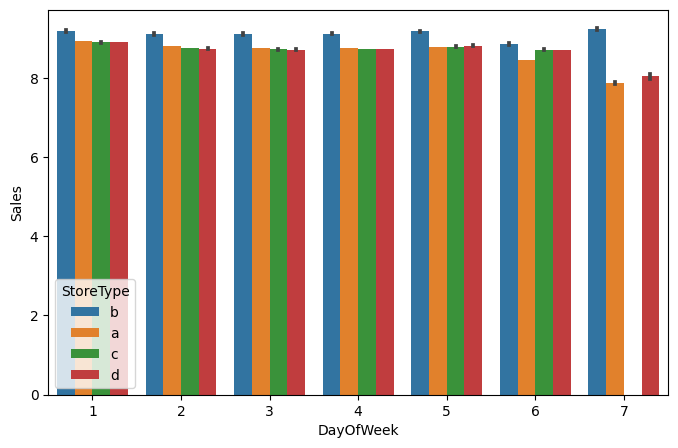

In [ ]:
#let's explore store type and Day Of week
sns.barplot(x=df_1['DayOfWeek'],y=df_1["Sales"],hue=df_1['StoreType']) # hue is for the color separatio accourding value given

In [ ]:
#let's verify in the full dataset
df_1.loc[(df_1['DayOfWeek']==7) & (df_1['StoreType']=='b')]

DayOfWeek      Sales  Customers  Promo  StateHoliday  \
Date      Store                                                         
1/11/2015 85             7   9.294314       1488      0             0   
          259            7   9.646141       2468      0             0   
          262            7  10.104672       3601      0             0   
          274            7   8.765771       1270      0             0   
          335            7   8.885718       1364      0             0   
...                    ...        ...        ...    ...           ...   
9/8/2013  733            7   9.610927       3123      0             0   
          769            7   9.153029       2388      0             0   
          948            7   8.957253       1692      0             0   
          1081           7   8.031060        517      0             0   
          1097           7   9.312987       2458      0             0   

                 SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date      Store                                                            
1/11/2015 85                 0         b          a               1870.0   
          259                0         b          b                210.0   
          262                0         b          a               1180.0   
          274                0         b          b               3640.0   
          335                0         b          a                 90.0   
...                        ...       ...        ...                  ...   
9/8/2013  733                0         b          b                860.0   
          769                0         b          b                840.0   
          948                0         b          b               1430.0   
          1081               0         b          a                400.0   
          1097               0         b          b                720.0   

                 Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date      Store                                                                
1/11/2015 85          0  2015      1           2         11             39.0   
          259         0  2015      1           2         11             16.0   
          262         0  2015      1           2         11             20.0   
          274         1  2015      1           2         11             16.0   
          335         1  2015      1           2         11             16.0   
...                 ...   ...    ...         ...        ...              ...   
9/8/2013  733         0  2013      9          36        251            167.0   
          769         1  2013      9          36        251              0.0   
          948         0  2013      9          36        251              0.0   
          1081        0  2013      9          36        251             90.0   
          1097        0  2013      9          36        251            138.0   

                 Promo2Open  Promo2running  
Date      Store                             
1/11/2015 85       0.000000              0  
          259      0.000000              0  
          262      0.000000              0  
          274     22.158904              1  
          335     17.326027              1  
...                     ...            ...  
9/8/2013  733      0.000000              0  
          769      9.238356              0  
          948      0.000000              0  
          1081     0.000000              0  
          1097     0.000000              0  

[2216 rows x 17 columns]

**Observation**:

* This suggests that store type b had high sales almost all week. No store of type C was open on Sunday.
* Being open 24*7 along with all kinds of assortments available is probably the reason why it had higher average sales than any other store type.

In [ ]:
# Shape of our dataframe
df_1.shape

(844338, 17)

**Outlier Treatment**

* It can be well established that the outliers are showing this behaviour for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behaviour seems fair and important from the business point of view.
* The primary reasons for the behaviour are promotion and store type B.
* If the outliers are a valid occurrence it would be wise not to treat them by deleting or manipulating them especially when we have established the ups and downs of the target variable in relation to the other features. It is well established that there is seasonality involved and no linear relationship is possible to fit. For these kinds of datasets tree based machine learning algorithms are used which are robust to outlier effect.

In [ ]:
# Ensuring that nothing would mess up 
df_to_work = df_1.copy()

In [ ]:
# heading of our dataframe
df_to_work.head(5)

DayOfWeek     Sales  Customers  Promo  StateHoliday  \
Date     Store                                                        
1/1/2013 85             2  8.347590        619      0             1   
         259            2  8.832150       1444      0             1   
         262            2  9.756552       2875      0             1   
         274            2  8.039802        729      0             1   
         335            2  7.783641        482      0             1   

                SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date     Store                                                            
1/1/2013 85                 1         b          a               1870.0   
         259                1         b          b                210.0   
         262                1         b          a               1180.0   
         274                1         b          b               3640.0   
         335                1         b          a                 90.0   

                Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date     Store                                                                
1/1/2013 85          0  2013      1           1          1             15.0   
         259         0  2013      1           1          1              0.0   
         262         0  2013      1           1          1              0.0   
         274         1  2013      1           1          1              0.0   
         335         1  2013      1           1          1              0.0   

                Promo2Open  Promo2running  
Date     Store                             
1/1/2013 85            0.0              0  
         259           0.0              0  
         262           0.0              0  
         274           0.0              1  
         335           0.0              1

In [ ]:
# Sales should be the last col
columns=list(df_to_work.columns)
columns.remove('Sales')
columns.append('Sales')
df_to_work=df_to_work[columns]

In [ ]:
# heading of our dataframe
df_to_work.head()

DayOfWeek  Customers  Promo  StateHoliday  SchoolHoliday  \
Date     Store                                                             
1/1/2013 85             2        619      0             1              1   
         259            2       1444      0             1              1   
         262            2       2875      0             1              1   
         274            2        729      0             1              1   
         335            2        482      0             1              1   

               StoreType Assortment  CompetitionDistance  Promo2  Year  Month  \
Date     Store                                                                  
1/1/2013 85            b          a               1870.0       0  2013      1   
         259           b          b                210.0       0  2013      1   
         262           b          a               1180.0       0  2013      1   
         274           b          b               3640.0       1  2013      1   
         335           b          a                 90.0       1  2013      1   

                WeekOfYear  DayOfYear  CompetitionOpen  Promo2Open  \
Date     Store                                                       
1/1/2013 85              1          1             15.0         0.0   
         259             1          1              0.0         0.0   
         262             1          1              0.0         0.0   
         274             1          1              0.0         0.0   
         335             1          1              0.0         0.0   

                Promo2running     Sales  
Date     Store                           
1/1/2013 85                 0  8.347590  
         259                0  8.832150  
         262                0  9.756552  
         274                1  8.039802  
         335                1  7.783641

# ML Modeling
**Factors affecting in choosing the model:**

Determining which algorithm to use depends on many factors like the problem statement and the kind of output you want, type and size of the data, the available computational time, number of features, and observations in the data, to name a few.

The dataset used in this analysis has:

* A multivariate time series relation with sales and hence a linear relationship cannot be assumed in this analysis. This kind of dataset has patterns such as peak days, festive seasons etc which would most likely be considered as outliers in simple linear regression.
* Having X columns with 30% continuous and 70% categorical features. Business prefers the model to be interpretable in nature and decision based algorithms work better with categorical data.

**Train-Test Split**

In [ ]:
#start date
df_to_work.reset_index(inplace = True)
df_to_work.head()

,Date,Store,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running,Sales
0,1/1/2013,85,2,619,0,1,1,b,a,1870.0,0,2013,1,1,1,15.0,0.0,0,8.347590
1,1/1/2013,259,2,1444,0,1,1,b,b,210.0,0,2013,1,1,1,0.0,0.0,0,8.832150
2,1/1/2013,262,2,2875,0,1,1,b,a,1180.0,0,2013,1,1,1,0.0,0.0,0,9.756552
3,1/1/2013,274,2,729,0,1,1,b,b,3640.0,1,2013,1,1,1,0.0,0.0,1,8.039802
4,1/1/2013,335,2,482,0,1,1,b,a,90.0,1,2013,1,1,1,0.0,0.0,1,7.783641


In [ ]:
# End date
df_to_work.tail()

,Date,Store,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running,Sales
844333,9/9/2014,1111,2,403,0,0,0,a,a,1900.0,1,2014,9,37,252,3.0,13.380822,0,8.252185
844334,9/9/2014,1112,2,651,0,0,0,c,c,1880.0,0,2014,9,37,252,101.0,0.000000,0,8.813587
844335,9/9/2014,1113,2,633,0,0,0,a,c,9260.0,0,2014,9,37,252,12.0,0.000000,0,8.502891
844336,9/9/2014,1114,2,2827,0,0,0,a,c,870.0,0,2014,9,37,252,12.0,0.000000,0,9.741792
844337,9/9/2014,1115,2,416,0,0,0,d,c,5350.0,1,2014,9,37,252,12.0,27.452055,1,8.602820


In [ ]:
# we won't need customers columns for sales forecasting
df_to_work.drop('Customers',axis=1,inplace=True)

In [ ]:
df_to_work.drop('Date',axis=1,inplace=True)

In [ ]:
# df_to_work.reset_index(inplace = True)
df_to_work.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running,Sales
0,85,2,0,1,1,b,a,1870.0,0,2013,1,1,1,15.0,0.0,0,8.347590
1,259,2,0,1,1,b,b,210.0,0,2013,1,1,1,0.0,0.0,0,8.832150
2,262,2,0,1,1,b,a,1180.0,0,2013,1,1,1,0.0,0.0,0,9.756552
3,274,2,0,1,1,b,b,3640.0,1,2013,1,1,1,0.0,0.0,1,8.039802
4,335,2,0,1,1,b,a,90.0,1,2013,1,1,1,0.0,0.0,1,7.783641


In [ ]:
df_to_work.tail()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running,Sales
844333,1111,2,0,0,0,a,a,1900.0,1,2014,9,37,252,3.0,13.380822,0,8.252185
844334,1112,2,0,0,0,c,c,1880.0,0,2014,9,37,252,101.0,0.000000,0,8.813587
844335,1113,2,0,0,0,a,c,9260.0,0,2014,9,37,252,12.0,0.000000,0,8.502891
844336,1114,2,0,0,0,a,c,870.0,0,2014,9,37,252,12.0,0.000000,0,9.741792
844337,1115,2,0,0,0,d,c,5350.0,1,2014,9,37,252,12.0,27.452055,1,8.602820


In [ ]:
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2014-06-05")
df_train = df_to_work.iloc[0:675200]
#test
start_test = pd.to_datetime("15-06-2014")
end_test = pd.to_datetime("09-09-2014")
df_test = df_to_work.loc[675201:844337]

In [ ]:
#csv
df_train_1 = df_train.to_csv("/content/df_train.csv")
df_test_2 = df_test.to_csv("/content/df_test.csv")

In [ ]:
# X and y split for train and test 
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (675200, 16)
The shape of y_train is: (675200, 1)
The shape of X_test is: (169137, 16)
The shape of y_test is: (169137, 1)


In [ ]:
#importing
from sklearn.preprocessing import OneHotEncoder
#categorical features
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']
#fit encoder
encoder = OneHotEncoder(sparse=False) # creating an object
# train
encoder.fit(X_train[categorical_cols])
encoded_features = list(encoder.get_feature_names_out(categorical_cols) ) #get_feature_names
X_train[encoded_features] = encoder.transform(X_train[categorical_cols])
# test
X_test[encoded_features] = encoder.transform(X_test[categorical_cols])
# drop original features
X_train.drop(categorical_cols,axis=1,inplace=True)
X_test.drop(categorical_cols,axis=1,inplace=True) # Dropping the columns after OneHotEncodinig

In [ ]:
X_train.columns

Index(['Store', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'Year', 'Month', 'WeekOfYear',
       'DayOfYear', 'CompetitionOpen', 'Promo2Open', 'Promo2running',
       'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c'],
      dtype='object')

In [ ]:
X_train.head().T

,0,1,2,3,4
Store,85.0,259.0,262.0,274.0,335.0
Promo,0.0,0.0,0.0,0.0,0.0
StateHoliday,1.0,1.0,1.0,1.0,1.0
SchoolHoliday,1.0,1.0,1.0,1.0,1.0
CompetitionDistance,1870.0,210.0,1180.0,3640.0,90.0
Promo2,0.0,0.0,0.0,1.0,1.0
Year,2013.0,2013.0,2013.0,2013.0,2013.0
Month,1.0,1.0,1.0,1.0,1.0
WeekOfYear,1.0,1.0,1.0,1.0,1.0
DayOfYear,1.0,1.0,1.0,1.0,1.0


In [ ]:
# Here we are standarizing the features
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler() # instanting an object from this class 
X_train[list(X_train.columns)] = stdsc.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = stdsc.transform(X_test[list(X_test.columns)])

scaler = StandardScaler() # creating an object from the class
y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])

**Baseline Model:** 

**Decision Tree**

A baseline is a simple model that provides reasonable results on a task and does not require much expertise and time to build. Decision trees are used for handling non-linear data sets effectively.

In [ ]:
#Importing Used libraries 
from sklearn.tree import DecisionTreeRegressor
#metrics import to use
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#fitting decision tree
dt_basic = DecisionTreeRegressor(random_state=42)
dt_basic.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

In [ ]:
# Function for  evaluating  the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
      
  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  a = y_test.copy()
  a['Pred Sales'] = y_pred_test.tolist()
  # df_plot = a.reset_index(level=['Date'])
  # plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
  # sns.lineplot(data = plot)
  # plt.ylabel("Total Sales and Predicted Sales")
  # plt.xticks(rotation = 25)

  #calculate metrics and print the results for test set
  #Mean Absolute Error or MAE
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  #Mean Squared Error or MSE
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  #Root Mean Squared Error or RMSE
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  #R2
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  #Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
  #printing test results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

  #Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

In [ ]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

In [ ]:
#decision tree evaluation
decision_tree = model_evaluation('Decision Tree Regressor',dt_basic,X_train,y_train,X_test,y_test)

The Mean Absolute Error for the validation set is 0.322245
The Mean Squared Error for the validation set is 0.186139
The Root Mean Squared Error for the validation set is 0.431439
The R^2 for the validation set is 0.804522
The Adjusted R^2 for the validation set is 0.804491


In [ ]:
#add results to comparison df
add_list_to_final_df(decision_tree)

In [ ]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.0,0.0,0.0,1.0,1.0,0.322245,0.186139,0.431439,0.804522,0.804491


**Observation:**

* The baseline model- Decision tree was chosen considering our features were mostly categorical with few having continuous importance. The above results show that a simple decision tree is performing pretty well on the validation set but it has completely overfitted the train set. It's better to have a much more generalized model for future data points.
* Businesses prefer the model to be interpretable in nature in order to understand the patterns and strategize accordingly unlike any scientific facility where the results matter much more than interpretability.
* If interpretability is important then sticking with tree based algorithms when most of the features are categorical; is beneficial and using tuned Hyperparameters to grow the tree deep enough without overfitting.

Random Forest

In [ ]:
# importing
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# fitting 
random_forest = RandomForestRegressor(n_estimators=100,random_state=42)
random_forest.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#model evaluation 
random_f = model_evaluation('Random Forest Regressor',random_forest,X_train,y_train,X_test,y_test)

The Mean Absolute Error for the validation set is 0.256015
The Mean Squared Error for the validation set is 0.114184
The Root Mean Squared Error for the validation set is 0.337911
The R^2 for the validation set is 0.880088
The Adjusted R^2 for the validation set is 0.880068


In [ ]:
# updating comparison df
add_list_to_final_df(random_f)

In [ ]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.000000,0.000000,0.000000,1.000000,1.000000,0.322245,0.186139,0.431439,0.804522,0.804491
1,Random Forest Regressor,0.079555,0.012966,0.113869,0.987034,0.987033,0.256015,0.114184,0.337911,0.880088,0.880068


In [ ]:
#parameters used in random forest
print('Parameters currently in use:')
print(random_forest.get_params())

Parameters currently in use:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


**Observation**:

Random Forest Regressor results were much better than our baseline model. Next we'll try to tune the hyperparameters and check the results.

Random Forest Hyperparameter Tuning

In [ ]:
#Importing important libraries and modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

In [ ]:
#metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#importing model 
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#setting date and store as index
df2.set_index(['Store'],inplace=True)
#sorting index following the time series
df2.sort_index(inplace=True)

In [ ]:
# Create model
rf_tuned = RandomForestRegressor()

In [ ]:
#import
from sklearn.model_selection import RandomizedSearchCV
#grid
random_grid = {'bootstrap': [True, False],
 'max_depth': [ 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 8],
 'n_estimators': [100, 130, 150]}

rf_random = RandomizedSearchCV(estimator = rf_tuned, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42)

#fitting
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 5.1min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 4.8min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time= 5.1min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 5.9min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 6.0min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 6.0min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [100, 130, 150]},
                   random_state=42, verbose=2)

In [ ]:
#best para
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [ ]:
#save the best parameters
random_t = rf_random.best_estimator_

In [ ]:
#evaluate tuned model
random_tuned = model_evaluation('Random Forest Tuned',random_t,X_train,y_train,X_test,y_test)

The Mean Absolute Error for the validation set is 0.241747
The Mean Squared Error for the validation set is 0.102342
The Root Mean Squared Error for the validation set is 0.319909
The R^2 for the validation set is 0.892524
The Adjusted R^2 for the validation set is 0.892507


In [ ]:
#add to comparison_df
comparison_df = comparison_df.append(random_tuned)

In [ ]:

#comparison_df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.000000,0.000000,0.000000,1.000000,1.000000,0.322245,0.186139,0.431439,0.804522,0.804491
0,Random Forest Tuned,0.159728,0.053049,0.230323,0.946951,0.946949,0.241747,0.102342,0.319909,0.892524,0.892507


Feature Importance

<Axes: xlabel='Importance', ylabel='Variable'>

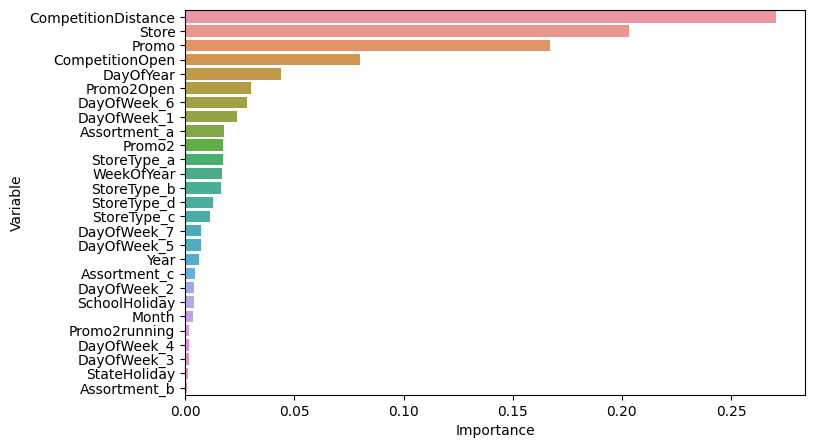

In [ ]:
#visualising feature importance of XGB
feature_imp = pd.DataFrame({"Variable": X_test.columns,"Importance": random_t.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp['Importance'], y= feature_imp['Variable'])

Model Performance and Evaluation

In [ ]:
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Test_Adj_R2
0,Decision Tree Regressor,0.000000,0.000000,0.000000,1.000000,1.000000,0.322245,0.186139,0.431439,0.804522,0.804491
0,Random Forest Tuned,0.159728,0.053049,0.230323,0.946951,0.946949,0.241747,0.102342,0.319909,0.892524,0.892507


<Axes: xlabel='Test_R2', ylabel='Model_Name'>

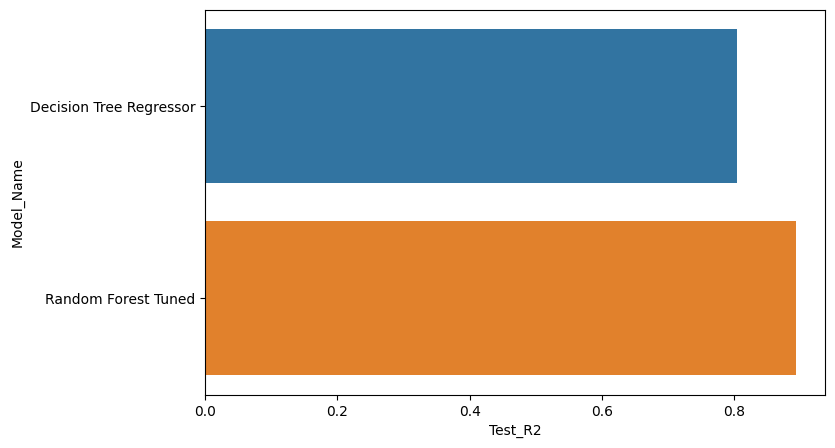

In [ ]:
#visualising our comparison df for Test R2
sns.barplot(y=comparison_df['Model_Name'], x = comparison_df['Test_R2'])

**Random Forest vs Baseline Model**

In [ ]:
#test values
baseline_r2 = 0.915750
random_r2 = 0.955673
r_tuned_r2 = 0.955878

In [ ]:
#improvement % 
improvement_r = ((random_r2 - baseline_r2)/baseline_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest against Decision Tree.')

Model Performance
Improvement of 4.36 % was seen in Random Forest against Decision Tree.


**Random Forest Tuned vs Baseline and Random Forest Models**

In [ ]:


#improvement % of tuned vs baseline

improvement_r = ((r_tuned_r2 - baseline_r2)/baseline_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Decision Tree.')

Model Performance
Improvement of 4.382 % was seen in Random Forest Tuned against Decision Tree.


In [ ]:
#improvement % of tuned vs simple random forest
improvement_r = ((r_tuned_r2 - random_r2)/random_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Simple Random Forest.')

Model Performance
Improvement of 0.021 % was seen in Random Forest Tuned against Simple Random Forest.


**Observation**

* The maximum R^2 was seen in tuned Random Forest model with the value 0.955878 which was only 0.021% improved from a simple random forest model.
* It seems like we have maxed out on performance with the data and these models.

**Store wise Sales Predictions**

In [ ]:
#predictions 
y_pred_test = random_t.predict(X_test)
six_weeks_sales_df = y_test.copy()
six_weeks_sales_df['Pred_Sales'] = y_pred_test.tolist()

In [ ]:
#head
six_weeks_sales_df.head()

,Sales,Pred_Sales
675201,-0.641616,-0.897197
675202,0.954008,1.053393
675203,0.995631,0.559865
675204,-0.164967,-0.279480
675205,-0.370591,-0.260946


In [ ]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
#fitting to the original data
cleaned_unscaled_data= df_to_work
#fitting numerical columns
numerical_cols = ['Sales']
scaler = MinMaxScaler()
scaler.fit(cleaned_unscaled_data[numerical_cols])

In [ ]:
#inverse
six_weeks_sales_df[['Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Sales']])
six_weeks_sales_df[['Pred_Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Pred_Sales']])

In [ ]:
#sales vs predictions
six_weeks_sales_df.head()

In [ ]:
#locating
six_weeks_sales_df.loc[('2015-06-15',5)]

In [ ]:
#locating
six_weeks_sales_df.loc[('2015-07-28',56)]

# Conclusion and Recommendations

**Conclusion**

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

The work here forecasts the sales of the various Rossmann stores across Europe for the recent six weeks and compares the results from the models developed with the actual sales values.

Some important conclusions drawn from the analysis are as follows:

* there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.
* The positive effect of promotion on Customers and Sales is observable.
* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away probably indicating competition in busy locations vs remote locations.
* Store type B though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.
* The outliers in the dataset showed justifiable behaviour. The outliers were either of store type b or had promotion going on which increased sales.
* Random Forest Tuned Model gave the best results and only 0.021% improvement was seen from the basic random forest model which indicates that all the trends and patterns that could be captured by these models without overfitting were done and maximum level of performance achievable by the model was achieved.

**Recommendations**

* More stores should be encouraged for promotion.
* Store type B should be increased in number.
* There's a seasonality involved, hence the stores should be encouraged to promote and take advantage of the holidays.